# Example for a simple neural network

## Trump by maximum color (2 colors)

The inputs to the network are the number of cards of each color. The network should learn to select the color with the largest number of cards of that color.

For a simple example, let us assume that there are 5 cards in total for a player and only 2 colors.

### Libraries

We use the keras library for building, training and evaluating the network. A tutorial for keras can be found on (https://keras.io/) or https://www.tensorflow.org/guide/keras. There are different implementations of keras, here I will use the one build on tensorflow.


In [135]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

## Exercise: Implement a ML Network to learn trump from features

We would like to train a network to get the trump from some features. (We could use the cards directly, but this is deep learning and we will see more of that in next lesson :-) )

As features we can use the number of cards of a color as before and some of the features from last lecture. For keras all input features should be floating point numbers. Also we need numpy arrays and not pandas. To get the array from a panda, the property `values` can be used.

In [136]:
import pandas as pd
from pathlib import Path
path_to_data = Path('data')
# Import only a fraction of data for efficient testing
data = pd.read_csv(path_to_data / '2018_10_18_trump.csv', header=None)

cards = [
# Diamonds
'DA','DK','DQ','DJ','D10','D9','D8','D7','D6',
# Hearts
'HA','HK','HQ','HJ','H10','H9','H8','H7','H6',
# Spades
'SA','SK','SQ','SJ','S10','S9','S8','S7','S6',
# Clubs
'CA','CK','CQ','CJ','C10','C9','C8','C7','C6'
]

# Forehand (yes = 1, no = 0)
forehand = ['FH']

user  = ['user']
trump = ['trump']

data.columns = cards + forehand + user + trump
data.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CQ,CJ,C10,C9,C8,C7,C6,FH,user,trump
0,0,0,0,1,1,0,1,1,0,0,...,1,0,0,0,1,0,0,0,53248,6
1,0,0,0,0,0,0,0,0,1,1,...,0,1,0,0,0,1,0,0,4613,5
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,68780,6
3,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,24555,5
4,0,1,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,1,8392,4


Continue as follows:
- Calculate features, 
- add them to the data set
- drop the columns not used
- convert to numpy array
- build a network and train

In [137]:
df = data.groupby('user').size().reset_index(name='counts')
df = df.drop(df[(df["counts"]>700)].index)['user']
data = data.drop(df)
data.drop(data[data.user==0].index, inplace=True)
data.drop('user', axis='columns', inplace=True)
data.head(10)

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CK,CQ,CJ,C10,C9,C8,C7,C6,FH,trump
0,0,0,0,1,1,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,6
2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,6
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,5
4,0,1,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,4
5,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,5
6,1,1,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,6
7,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,1
8,0,1,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,1,5
10,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,2
11,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,5


In [138]:
data.trump.value_counts()

6    101406
5     32897
2     29181
3     28966
4     26233
0     22130
1     22110
Name: trump, dtype: int64

In [139]:
data.trump = data.trump.astype('category')
data.trump.cat.rename_categories({0: 'DIAMONDS', 1: 'HEARTS', 2: 'SPADES', 3:'CLUBS',
                                  4: 'OBE_ABE', 5: 'UNE_UFE', 6: 'PUSH', 10: 'PUSH'}, inplace=True)

data.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CK,CQ,CJ,C10,C9,C8,C7,C6,FH,trump
0,0,0,0,1,1,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,PUSH
2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,PUSH
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,UNE_UFE
4,0,1,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,OBE_ABE
5,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,UNE_UFE


In [140]:
data = data.drop(data[((data.trump == 'PUSH') & (data.index % 3 != 0))].index)  
data.head(15)

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CK,CQ,CJ,C10,C9,C8,C7,C6,FH,trump
0,0,0,0,1,1,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,PUSH
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,UNE_UFE
4,0,1,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,OBE_ABE
5,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,UNE_UFE
6,1,1,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,PUSH
7,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,HEARTS
8,0,1,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,1,UNE_UFE
10,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,SPADES
11,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,UNE_UFE
15,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,OBE_ABE


In [141]:
data.trump.value_counts()

PUSH        33934
UNE_UFE     32897
SPADES      29181
CLUBS       28966
OBE_ABE     26233
DIAMONDS    22130
HEARTS      22110
Name: trump, dtype: int64

In [142]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

X_train_data = train.drop('trump', axis=1)
X_test_data = test.drop('trump', axis=1)

y_train_data = train.trump
y_test_data = test.trump

In [143]:
y_train_data = pd.get_dummies(y_train_data)
y_test_data = pd.get_dummies(y_test_data)

print(y_train_data.head())
print(y_test_data.head())

        DIAMONDS  HEARTS  SPADES  CLUBS  OBE_ABE  UNE_UFE  PUSH
27494          0       1       0      0        0        0     0
44319          0       0       0      0        1        0     0
46109          0       1       0      0        0        0     0
296562         0       0       0      0        0        0     1
113634         0       0       1      0        0        0     0
        DIAMONDS  HEARTS  SPADES  CLUBS  OBE_ABE  UNE_UFE  PUSH
192934         0       0       0      0        1        0     0
247809         0       0       0      0        0        0     1
317593         0       0       1      0        0        0     0
214632         0       0       0      0        0        0     1
192246         0       0       0      0        0        0     1


In [144]:
X_train = np.array(X_train_data)
X_test = np.array(X_test_data)

y_train = np.array(y_train_data)
y_test = np.array(y_test_data)

In [145]:
model = keras.Sequential()
model.add(keras.layers.Dense(74, activation='relu', input_shape=[37]))
model.add(keras.layers.Dense(36, activation='relu'))
model.add(keras.layers.Dense(18, activation='relu'))
model.add(keras.layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.25, epochs=25, batch_size=1000)

Train on 117270 samples, validate on 39090 samples
Epoch 1/25
117270/117270 [==============================] - 2s 15us/sample - loss: 1.3885 - acc: 0.4712 - val_loss: 0.9422 - val_acc: 0.6200
Epoch 2/25
117270/117270 [==============================] - 1s 7us/sample - loss: 0.9050 - acc: 0.6296 - val_loss: 0.8780 - val_acc: 0.6370
Epoch 3/25
117270/117270 [==============================] - 1s 7us/sample - loss: 0.8799 - acc: 0.6349 - val_loss: 0.8645 - val_acc: 0.6409
Epoch 4/25
117270/117270 [==============================] - 1s 7us/sample - loss: 0.8659 - acc: 0.6395 - val_loss: 0.8556 - val_acc: 0.6384
Epoch 5/25
117270/117270 [==============================] - 1s 7us/sample - loss: 0.8536 - acc: 0.6428 - val_loss: 0.8438 - val_acc: 0.6439
Epoch 6/25
117270/117270 [==============================] - 1s 7us/sample - loss: 0.8426 - acc: 0.6463 - val_loss: 0.8310 - val_acc: 0.6514
Epoch 7/25
117270/117270 [==============================] - 1s 7us/sample - loss: 0.8315 - acc: 0.6497 - val

In [146]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


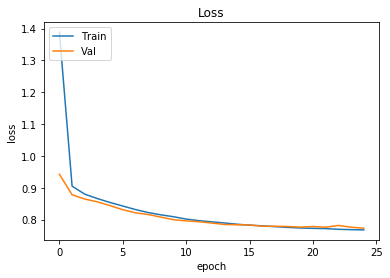

In [147]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Val'], loc='upper left')

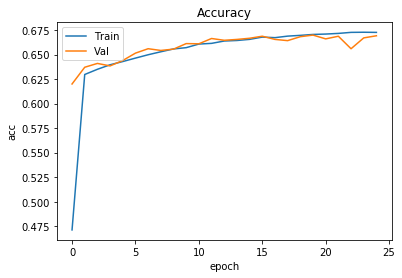

In [148]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Val'], loc='upper left')

In [149]:
model = keras.Sequential()
model.add(keras.layers.Dense(74, activation='relu', input_shape=[37]))
model.add(keras.layers.Dense(36, activation='relu'))
model.add(keras.layers.Dense(18, activation='relu'))
model.add(keras.layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.25, epochs=25, batch_size=1000)

Train on 117270 samples, validate on 39090 samples
Epoch 1/25
117270/117270 [==============================] - 2s 16us/sample - loss: 1.5033 - acc: 0.4156 - val_loss: 1.0018 - val_acc: 0.5997
Epoch 2/25
117270/117270 [==============================] - 1s 7us/sample - loss: 0.9109 - acc: 0.6279 - val_loss: 0.8736 - val_acc: 0.6414
Epoch 3/25
117270/117270 [==============================] - 1s 7us/sample - loss: 0.8757 - acc: 0.6372 - val_loss: 0.8651 - val_acc: 0.6388
Epoch 4/25
117270/117270 [==============================] - 1s 7us/sample - loss: 0.8623 - acc: 0.6397 - val_loss: 0.8474 - val_acc: 0.6427
Epoch 5/25
117270/117270 [==============================] - 1s 7us/sample - loss: 0.8462 - acc: 0.6450 - val_loss: 0.8359 - val_acc: 0.6489
Epoch 6/25
117270/117270 [==============================] - 1s 8us/sample - loss: 0.8327 - acc: 0.6486 - val_loss: 0.8222 - val_acc: 0.6536
Epoch 7/25
117270/117270 [==============================] - 1s 7us/sample - loss: 0.8195 - acc: 0.6530 - val

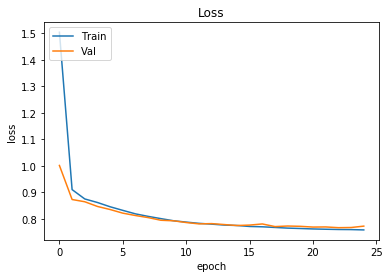

In [150]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Val'], loc='upper left')

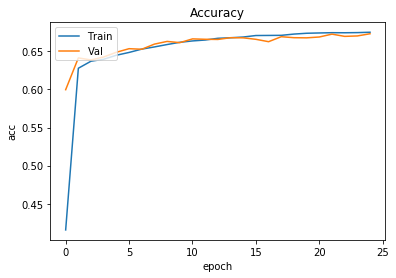

In [151]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Val'], loc='upper left')

In [152]:
model = keras.Sequential()
model.add(keras.layers.Dense(148, activation='relu', input_shape=[37]))
model.add(keras.layers.Dense(74, activation='relu'))
model.add(keras.layers.Dense(74, activation='relu'))
model.add(keras.layers.Dense(36, activation='relu'))
model.add(keras.layers.Dense(36, activation='relu'))
model.add(keras.layers.Dense(18, activation='relu'))
model.add(keras.layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.25, epochs=25, batch_size=1000)

Train on 117270 samples, validate on 39090 samples
Epoch 1/25
117270/117270 [==============================] - 2s 21us/sample - loss: 1.2709 - acc: 0.5024 - val_loss: 0.9058 - val_acc: 0.6274
Epoch 2/25
117270/117270 [==============================] - 1s 11us/sample - loss: 0.8872 - acc: 0.6344 - val_loss: 0.8619 - val_acc: 0.6444
Epoch 3/25
117270/117270 [==============================] - 1s 11us/sample - loss: 0.8467 - acc: 0.6452 - val_loss: 0.8292 - val_acc: 0.6487
Epoch 4/25
117270/117270 [==============================] - 1s 11us/sample - loss: 0.8184 - acc: 0.6541 - val_loss: 0.8192 - val_acc: 0.6561
Epoch 5/25
117270/117270 [==============================] - 1s 11us/sample - loss: 0.7964 - acc: 0.6613 - val_loss: 0.7948 - val_acc: 0.6615
Epoch 6/25
117270/117270 [==============================] - 1s 11us/sample - loss: 0.7846 - acc: 0.6663 - val_loss: 0.7854 - val_acc: 0.6624
Epoch 7/25
117270/117270 [==============================] - 1s 11us/sample - loss: 0.7762 - acc: 0.6690

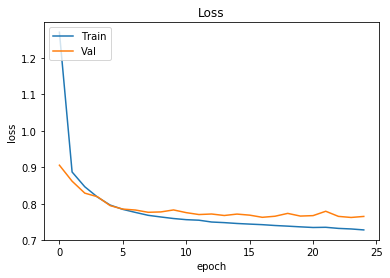

In [153]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Val'], loc='upper left')

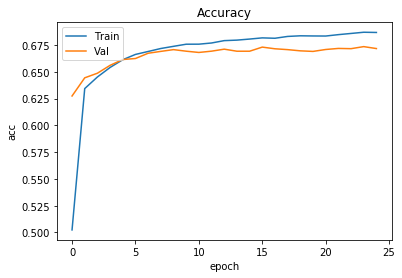

In [154]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Val'], loc='upper left')

In [155]:
model = keras.Sequential()
model.add(keras.layers.Dense(148, activation='relu', input_shape=[37]))
model.add(keras.layers.Dense(74, activation='relu'))
model.add(keras.layers.Dense(74, activation='relu'))
model.add(keras.layers.Dense(36, activation='relu'))
model.add(keras.layers.Dense(36, activation='relu'))
model.add(keras.layers.Dense(18, activation='relu'))
model.add(keras.layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.25, epochs=25, batch_size=1000)

Train on 117270 samples, validate on 39090 samples
Epoch 1/25
117270/117270 [==============================] - 2s 19us/sample - loss: 1.2777 - acc: 0.5031 - val_loss: 1.0119 - val_acc: 0.6019
Epoch 2/25
117270/117270 [==============================] - 1s 10us/sample - loss: 0.9466 - acc: 0.6194 - val_loss: 0.9510 - val_acc: 0.6169
Epoch 3/25
117270/117270 [==============================] - 1s 11us/sample - loss: 0.9005 - acc: 0.6325 - val_loss: 0.9206 - val_acc: 0.6233
Epoch 4/25
117270/117270 [==============================] - 1s 10us/sample - loss: 0.8712 - acc: 0.6401 - val_loss: 0.8621 - val_acc: 0.6442
Epoch 5/25
117270/117270 [==============================] - 1s 11us/sample - loss: 0.8481 - acc: 0.6466 - val_loss: 0.8452 - val_acc: 0.6488
Epoch 6/25
117270/117270 [==============================] - 1s 11us/sample - loss: 0.8284 - acc: 0.6510 - val_loss: 0.8522 - val_acc: 0.6442
Epoch 7/25
117270/117270 [==============================] - 1s 12us/sample - loss: 0.8164 - acc: 0.6568

In [156]:
model = keras.Sequential()
model.add(keras.layers.Dense(37, activation='relu', input_shape=[37]))
model.add(keras.layers.Dense(6, activation='relu'))
model.add(keras.layers.Dense(6, activation='relu'))
model.add(keras.layers.Dense(6, activation='relu'))
model.add(keras.layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.25, epochs=25, batch_size=1000)

Train on 117270 samples, validate on 39090 samples
Epoch 1/25
117270/117270 [==============================] - 2s 17us/sample - loss: 1.8574 - acc: 0.2392 - val_loss: 1.7178 - val_acc: 0.3259
Epoch 2/25
117270/117270 [==============================] - 1s 8us/sample - loss: 1.5802 - acc: 0.3681 - val_loss: 1.4679 - val_acc: 0.4082
Epoch 3/25
117270/117270 [==============================] - 1s 8us/sample - loss: 1.3443 - acc: 0.4662 - val_loss: 1.2336 - val_acc: 0.5112
Epoch 4/25
117270/117270 [==============================] - 1s 8us/sample - loss: 1.1800 - acc: 0.5385 - val_loss: 1.1318 - val_acc: 0.5597
Epoch 5/25
117270/117270 [==============================] - 1s 8us/sample - loss: 1.1047 - acc: 0.5745 - val_loss: 1.0760 - val_acc: 0.5866
Epoch 6/25
117270/117270 [==============================] - 1s 9us/sample - loss: 1.0621 - acc: 0.5936 - val_loss: 1.0449 - val_acc: 0.5971
Epoch 7/25
117270/117270 [==============================] - 1s 8us/sample - loss: 1.0363 - acc: 0.6045 - val